# 1. Read trajectory data

In [1]:
import pandas as pd
import geopandas as gp
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
HEADER=['device_key',
        'unix_time',
        'min_duration_seconds',
        'observation_count',
        'cluster_type',
        'visit_centroid_lat',
        'visit_centroid_lon',
        'visit_dispersion',
        'trajectory_start_lat',
        'trajectory_start_lon',
        'trajectory_end_lat',
        'trajectory_end_lon',
        'movement_source_key',
        'dma_code',
        'state_abbr',
        'zipcode_5']

In [3]:
d=[]
for i in range(0,10):
    print(i)
    #d1=pd.read_csv('./Data/unattributed_march2021/landmark_v4_1/csv/fact_unattributed_visit/dt=20210301/part-0000'+str(i)+'-149b3b1a-4455-4e48-9236-645f0600f77b-c000.csv.gz',header=None)
    d1=pd.read_csv('D:\\GNN\sample_data_mn_20200301-20220424T172614Z-001\\sample_data_mn_20200301\dt=20200301\\part-0000'+str(i)+'-61566f34-33dd-443c-b12a-88c0f31ba715-c000.csv')
    d1.columns=HEADER
    d.append(d1)

0
1
2
3
4
5
6
7
8
9


In [4]:
d1=pd.concat(d) # whole day 2021/03/01
d1.reset_index(inplace=True)
d1.drop('index',axis=1,inplace=True)
d1['date_time'] = [datetime.fromtimestamp(x) for x in d1['unix_time']]
date = d1['date_time']
d1.drop(labels=['date_time'], axis=1, inplace = True)
d1.insert(1, 'date_time', date)

In [136]:
d1

,device_key,date_time,unix_time,min_duration_seconds,observation_count,cluster_type,visit_centroid_lat,visit_centroid_lon,visit_dispersion,trajectory_start_lat,trajectory_start_lon,trajectory_end_lat,trajectory_end_lon,movement_source_key,dma_code,state_abbr,zipcode_5
0,33349900140,2020-03-01 17:55:02,1583081702,120,1,visit,44.967600,-93.07720,0.00000,NaN,NaN,NaN,NaN,110,613,MN,55130.0
1,37900408815,2020-03-01 17:58:19,1583081899,0,1,visit,44.912100,-93.17170,0.00000,NaN,NaN,NaN,NaN,110,613,MN,55116.0
2,17197742708,2020-03-01 17:30:11,1583080211,40,5,trajectory,NaN,NaN,NaN,44.33745,-93.96106,44.33981,-93.95832,110,613,MN,56082.0
3,43699207708,2020-03-01 16:53:06,1583077986,2655,2,visit,45.098595,-93.02079,38.84083,NaN,NaN,NaN,NaN,110,613,MN,55110.0
4,48308455723,2020-03-01 17:40:06,1583080806,762,3,trajectory,NaN,NaN,NaN,45.21189,-93.41372,45.24889,-93.42917,110,613,MN,55303.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9487355,35619273680,2020-03-01 04:41:31,1583034091,0,1,visit,45.152200,-93.41830,0.00000,NaN,NaN,NaN,NaN,231,613,MN,55316.0
9487356,80337075085,2020-03-01 20:31:53,1583091113,0,1,visit,44.167200,-94.02220,0.00000,NaN,NaN,NaN,NaN,231,613,MN,56003.0
9487357,89831000698,2020-03-01 22:30:40,1583098240,0,1,visit,46.922500,-95.04780,0.00000,NaN,NaN,NaN,NaN,231,613,MN,56470.0
9487358,26095211387,2020-03-01 03:56:16,1583031376,0,1,visit,44.974500,-93.23030,0.00000,NaN,NaN,NaN,NaN,231,613,MN,55414.0


In [135]:
d1['trajectory_start_lat']

0               NaN
1               NaN
2          44.33745
3               NaN
4          45.21189
             ...   
9487355         NaN
9487356         NaN
9487357         NaN
9487358         NaN
9487359         NaN
Name: trajectory_start_lat, Length: 9487360, dtype: float64

In [5]:
d1['movement_source_key'].value_counts()

231    3470841
215    1935417
110    1825040
756    1391997
786     573901
425     290164
Name: movement_source_key, dtype: int64

In [44]:
user1=d1.query('device_key==33349900140').sort_values('unix_time')

In [8]:
user1=user1.query('cluster_type=="trajectory"')

In [38]:
user1

,device_key,date_time,unix_time,min_duration_seconds,observation_count,cluster_type,visit_centroid_lat,visit_centroid_lon,visit_dispersion,trajectory_start_lat,trajectory_start_lon,trajectory_end_lat,trajectory_end_lon,movement_source_key,dma_code,state_abbr,zipcode_5,geometry
6862190,33349900140,2020-03-01 17:36:03,1583080563,915,4,trajectory,NaN,NaN,NaN,45.02739,-93.10131,44.97016,-93.08879,110,613,MN,55117.0,POINT EMPTY
1365905,33349900140,2020-03-01 17:36:03,1583080563,1259,3,trajectory,NaN,NaN,NaN,45.02739,-93.10132,44.96755,-93.07720,425,613,MN,55117.0,POINT EMPTY
4213341,33349900140,2020-03-01 17:36:03,1583080563,915,4,trajectory,NaN,NaN,NaN,45.02738,-93.10132,44.97015,-93.08879,215,613,MN,55117.0,POINT EMPTY
1488660,33349900140,2020-03-01 21:10:49,1583093449,2685,3,trajectory,NaN,NaN,NaN,44.97727,-93.08366,45.01697,-93.10566,215,613,MN,55130.0,POINT EMPTY
8965654,33349900140,2020-03-01 21:10:49,1583093449,2820,3,trajectory,NaN,NaN,NaN,44.97727,-93.08366,45.02734,-93.10129,425,613,MN,55130.0,POINT EMPTY


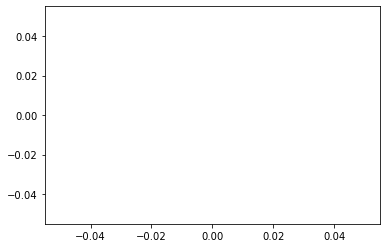

In [39]:
plt.plot(user1.visit_centroid_lon,user1.visit_centroid_lat,linestyle='-',color='blue')

In [10]:


for i in range(len(user1)):
    plt.plot(user1.trajectory_start_lat.values[i],)

6862190    45.02739
1365905    45.02739
4213341    45.02738
1488660    44.97727
8965654    44.97727
Name: trajectory_start_lat, dtype: float64

45.02739

# 2.read CBG data

In [32]:
import os
import geopandas as gpd

cbg_path='D:\\GNN\\sample_data_mn_20200301-20220424T172614Z-001\\sample_data_mn_20200301\\'

cbg = gpd.read_file(cbg_path+"geo/cbg_TCMA.geojson")

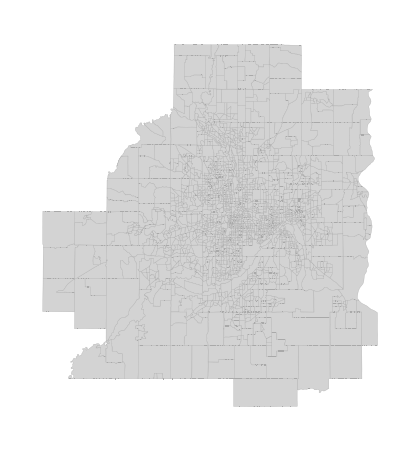

In [34]:
import geoplot
import geoplot.crs as gcrs

geoplot.polyplot(cbg, projection=gcrs.AlbersEqualArea(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3,
    figsize=(12, 8))
plt.plot(user1.visit_centroid_lon,user1.visit_centroid_lat,linestyle='-',color='blue')

In [ ]:
user1

In [40]:
gdf_user1 = gpd.GeoDataFrame(
    user1, geometry=gpd.points_from_xy(user1.visit_centroid_lon, user1.visit_centroid_lat))

In [42]:
gdf_user1

,device_key,date_time,unix_time,min_duration_seconds,observation_count,cluster_type,visit_centroid_lat,visit_centroid_lon,visit_dispersion,trajectory_start_lat,trajectory_start_lon,trajectory_end_lat,trajectory_end_lon,movement_source_key,dma_code,state_abbr,zipcode_5,geometry
6862190,33349900140,2020-03-01 17:36:03,1583080563,915,4,trajectory,NaN,NaN,NaN,45.02739,-93.10131,44.97016,-93.08879,110,613,MN,55117.0,POINT EMPTY
1365905,33349900140,2020-03-01 17:36:03,1583080563,1259,3,trajectory,NaN,NaN,NaN,45.02739,-93.10132,44.96755,-93.07720,425,613,MN,55117.0,POINT EMPTY
4213341,33349900140,2020-03-01 17:36:03,1583080563,915,4,trajectory,NaN,NaN,NaN,45.02738,-93.10132,44.97015,-93.08879,215,613,MN,55117.0,POINT EMPTY
1488660,33349900140,2020-03-01 21:10:49,1583093449,2685,3,trajectory,NaN,NaN,NaN,44.97727,-93.08366,45.01697,-93.10566,215,613,MN,55130.0,POINT EMPTY
8965654,33349900140,2020-03-01 21:10:49,1583093449,2820,3,trajectory,NaN,NaN,NaN,44.97727,-93.08366,45.02734,-93.10129,425,613,MN,55130.0,POINT EMPTY


D:\Anaconda\lib\site-packages\geopandas\plotting.py:410: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  warnings.warn(


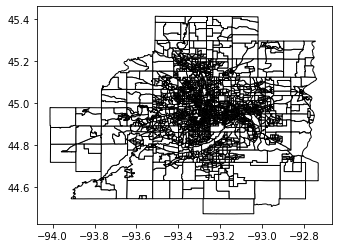

In [41]:
ax = cbg.plot(
    color='white', edgecolor='black')

gdf_user1.plot(ax=ax, color='red')


D:\Anaconda\lib\site-packages\geopandas\plotting.py:410: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  warnings.warn(


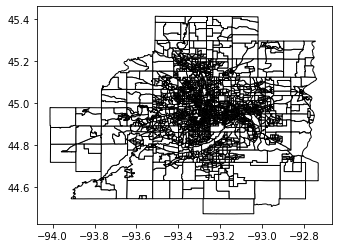

In [43]:
ax = cbg.plot(
    color='white', edgecolor='black')
gdf_user1.plot(ax=ax, color='red')



In [73]:
d1_tra=d1.query('cluster_type=="trajectory"')
d1_visit=d1.query('cluster_type=="visit"')

In [143]:
d1_tra['trajectory_end_lon'].isnull(). values.any() 

False

In [74]:
d1_tra

,device_key,date_time,unix_time,min_duration_seconds,observation_count,cluster_type,visit_centroid_lat,visit_centroid_lon,visit_dispersion,trajectory_start_lat,trajectory_start_lon,trajectory_end_lat,trajectory_end_lon,movement_source_key,dma_code,state_abbr,zipcode_5
2,17197742708,2020-03-01 17:30:11,1583080211,40,5,trajectory,NaN,NaN,NaN,44.33745,-93.96106,44.33981,-93.95832,110,613,MN,56082.0
4,48308455723,2020-03-01 17:40:06,1583080806,762,3,trajectory,NaN,NaN,NaN,45.21189,-93.41372,45.24889,-93.42917,110,613,MN,55303.0
6,99192131227,2020-03-01 23:05:42,1583100342,877,5,trajectory,NaN,NaN,NaN,44.44796,-92.89415,44.63086,-93.04075,110,613,MN,55009.0
15,7849805210,2020-03-01 10:31:34,1583055094,5819,4,trajectory,NaN,NaN,NaN,44.98267,-93.27207,45.07144,-93.25827,110,613,MN,55401.0
27,1420042838,2020-03-01 19:22:39,1583086959,426,3,trajectory,NaN,NaN,NaN,45.20709,-93.35858,45.19795,-93.35703,110,613,MN,55448.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9487339,75534396475,2020-03-01 16:15:51,1583075751,639,6,trajectory,NaN,NaN,NaN,44.17321,-93.26079,44.31800,-93.29567,231,613,MN,55049.0
9487341,47790009994,2020-03-02 00:03:02,1583103782,474,14,trajectory,NaN,NaN,NaN,46.10846,-95.96471,46.03767,-95.93637,231,724,MN,56324.0
9487344,109236477984,2020-03-01 19:50:42,1583088642,1206,29,trajectory,NaN,NaN,NaN,45.06232,-92.82777,44.94239,-92.93833,231,613,MN,55082.0
9487345,47299265298,2020-03-01 21:57:59,1583096279,136,3,trajectory,NaN,NaN,NaN,44.88805,-92.94127,44.88824,-92.94752,231,613,MN,55125.0


In [75]:
gdf_d1_o= gpd.GeoDataFrame(
    d1_tra, geometry=gpd.points_from_xy(d1_tra.trajectory_start_lon, d1_tra.trajectory_start_lat))

#gdf_d1_d= gpd.GeoDataFrame(
   # d1_tra, geometry=gpd.points_from_xy(d1_tra.trajectory_end_lon, d1_tra.trajectory_end_lat))



In [79]:
d1_tra=d1.query('cluster_type=="trajectory"')

d1_tra
gdf_d1_d= gpd.GeoDataFrame(
    d1_tra, geometry=gpd.points_from_xy(d1_tra.trajectory_end_lon, d1_tra.trajectory_end_lat))


In [82]:
gdf_d1_o

,device_key,date_time,unix_time,min_duration_seconds,observation_count,cluster_type,visit_centroid_lat,visit_centroid_lon,visit_dispersion,trajectory_start_lat,trajectory_start_lon,trajectory_end_lat,trajectory_end_lon,movement_source_key,dma_code,state_abbr,zipcode_5,geometry
2,17197742708,2020-03-01 17:30:11,1583080211,40,5,trajectory,NaN,NaN,NaN,44.33745,-93.96106,44.33981,-93.95832,110,613,MN,56082.0,POINT (-93.96106 44.33745)
4,48308455723,2020-03-01 17:40:06,1583080806,762,3,trajectory,NaN,NaN,NaN,45.21189,-93.41372,45.24889,-93.42917,110,613,MN,55303.0,POINT (-93.41372 45.21189)
6,99192131227,2020-03-01 23:05:42,1583100342,877,5,trajectory,NaN,NaN,NaN,44.44796,-92.89415,44.63086,-93.04075,110,613,MN,55009.0,POINT (-92.89415 44.44796)
15,7849805210,2020-03-01 10:31:34,1583055094,5819,4,trajectory,NaN,NaN,NaN,44.98267,-93.27207,45.07144,-93.25827,110,613,MN,55401.0,POINT (-93.27207 44.98267)
27,1420042838,2020-03-01 19:22:39,1583086959,426,3,trajectory,NaN,NaN,NaN,45.20709,-93.35858,45.19795,-93.35703,110,613,MN,55448.0,POINT (-93.35858 45.20709)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9487339,75534396475,2020-03-01 16:15:51,1583075751,639,6,trajectory,NaN,NaN,NaN,44.17321,-93.26079,44.31800,-93.29567,231,613,MN,55049.0,POINT (-93.26079 44.17321)
9487341,47790009994,2020-03-02 00:03:02,1583103782,474,14,trajectory,NaN,NaN,NaN,46.10846,-95.96471,46.03767,-95.93637,231,724,MN,56324.0,POINT (-95.96471 46.10846)
9487344,109236477984,2020-03-01 19:50:42,1583088642,1206,29,trajectory,NaN,NaN,NaN,45.06232,-92.82777,44.94239,-92.93833,231,613,MN,55082.0,POINT (-92.82777 45.06232)
9487345,47299265298,2020-03-01 21:57:59,1583096279,136,3,trajectory,NaN,NaN,NaN,44.88805,-92.94127,44.88824,-92.94752,231,613,MN,55125.0,POINT (-92.94127 44.88805)


In [83]:
gdf_d1_o['geometry']

2          POINT (-93.96106 44.33745)
4          POINT (-93.41372 45.21189)
6          POINT (-92.89415 44.44796)
15         POINT (-93.27207 44.98267)
27         POINT (-93.35858 45.20709)
                      ...            
9487339    POINT (-93.26079 44.17321)
9487341    POINT (-95.96471 46.10846)
9487344    POINT (-92.82777 45.06232)
9487345    POINT (-92.94127 44.88805)
9487352    POINT (-92.45017 44.06641)
Name: geometry, Length: 2370828, dtype: geometry

In [84]:
gdf_d1_d['geometry']

2          POINT (-93.95832 44.33981)
4          POINT (-93.42917 45.24889)
6          POINT (-93.04075 44.63086)
15         POINT (-93.25827 45.07144)
27         POINT (-93.35703 45.19795)
                      ...            
9487339    POINT (-93.29567 44.31800)
9487341    POINT (-95.93637 46.03767)
9487344    POINT (-92.93833 44.94239)
9487345    POINT (-92.94752 44.88824)
9487352    POINT (-92.42909 44.04789)
Name: geometry, Length: 2370828, dtype: geometry

In [ ]:
gdf_d1

In [ ]:
cbg

In [52]:
len(cbg.CensusBlockGroup.unique())

2085

In [53]:
cbg.head()

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry
0,27,019,091100,1,270190911001,MN,Carver County,H1,"MULTIPOLYGON (((-93.76804 44.64280, -93.76804 ..."
1,27,019,091201,1,270190912011,MN,Carver County,H1,"MULTIPOLYGON (((-94.01048 44.71880, -94.01047 ..."
2,27,019,090800,2,270190908002,MN,Carver County,H1,"MULTIPOLYGON (((-93.61734 44.83011, -93.61261 ..."
3,27,019,090100,2,270190901002,MN,Carver County,H1,"MULTIPOLYGON (((-93.88993 44.97638, -93.88990 ..."
4,27,019,090302,1,270190903021,MN,Carver County,H1,"MULTIPOLYGON (((-93.88203 44.80464, -93.87963 ..."


spatial join of OD data and CBG data

In [85]:
gdf_d1_o.crs= "EPSG:4326" 
gdf_d1_d.crs= "EPSG:4326" 

gdf_d1_o=gdf_d1_o.to_crs(cbg.crs)
gdf_d1_d=gdf_d1_d.to_crs(cbg.crs)

o_with_cbg = gpd.sjoin(gdf_d1_o, cbg, how="inner")
d_with_cbg = gpd.sjoin(gdf_d1_d, cbg, how="inner")

In [94]:
o_with_cbg=o_with_cbg.rename(columns={'CensusBlockGroup':'cbg_o'})
d_with_cbg=d_with_cbg.rename(columns={'CensusBlockGroup':'cbg_d'})


In [171]:
o_with_cbg['cbg_o'].isnull().values.any()

False

In [180]:
od_cbg=pd.concat([o_with_cbg,d_with_cbg['cbg_d']],axis=1)
od_cbg['od']=od_cbg['cbg_o']+','+od_cbg['cbg_d']

In [181]:
od_cbg_clean=od_cbg.query('od==od')

In [186]:
od_cbg_clean.head()
od_cbg_clean.to_csv('points_with_cbg_od_all_traj.csv')

In [178]:
#o_with_cbg['cbg_o'].isnull(). values.any() 
od_cbg_clean['od'].isnull(). values.any() 

False

In [179]:
od_cbg_clean['od'].value_counts()

270539800001,270539800001    7255
270530269092,270530269092    3349
271390803011,271390803011    2460
270530251002,270530251002    2371
271630710181,271630710181    2102
                             ... 
270530259033,270530267104       1
270530084001,270531052012       1
270530003003,270531007001       1
271230367003,270530249022       1
270530253023,270530239033       1
Name: od, Length: 262063, dtype: int64

In [183]:
OD=od_cbg_clean['od'].value_counts()

In [185]:
OD.to_csv('OD_traj.csv')

In [261]:
Data=pd.read_csv('D://GNN/OCD//points_with_cbg_od_all_traj.csv')
Data

In [129]:
str(OD.index[0]).split(',')[0]

'270539800001'

Create the dic(key and value)

In [190]:
od_cbg_clean['cbg_d'].apply(int)
uniqueID=od_cbg_clean['cbg_d'].unique()
uniqueID.sort()
#uniqueID.shape
key=range(0,2085)
dic_id = dict(zip(key, uniqueID))

In [191]:
len(dic_id)

2085

In [192]:
dic_id_new = dict([(value, key) for (key, value) in dic_id.items()])


In [ ]:
dic_id_new

In [194]:
OD



270539800001,270539800001    7255
270530269092,270530269092    3349
271390803011,271390803011    2460
270530251002,270530251002    2371
271630710181,271630710181    2102
                             ... 
270530259033,270530267104       1
270530084001,270531052012       1
270530003003,270531007001       1
271230367003,270530249022       1
270530253023,270530239033       1
Name: od, Length: 262063, dtype: int64

In [195]:
OD_list=[[] for i in range(262063)]

for i in range(0,262063):
    OD_list[i].append(OD.index[i].split(',')[0])
    OD_list[i].append(OD.index[i].split(',')[1])
    OD_list[i].append(OD[i])


In [197]:
OD_pd=pd.DataFrame(OD_list,columns=['O','D','flow'])

In [198]:
OD_pd

,O,D,flow
0,270539800001,270539800001,7255
1,270530269092,270530269092,3349
2,271390803011,271390803011,2460
3,270530251002,270530251002,2371
4,271630710181,271630710181,2102
...,...,...,...
262058,270530259033,270530267104,1
262059,270530084001,270531052012,1
262060,270530003003,270531007001,1
262061,271230367003,270530249022,1


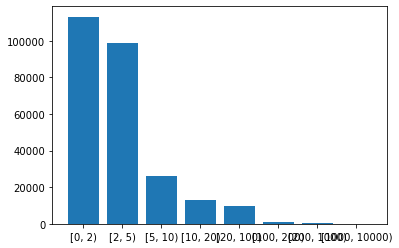

In [199]:
bins=[0,2,5,10,20,100,200,1000,10000]
segments=pd.cut(OD_pd['flow'],bins,right=False)
counts=pd.value_counts(segments,sort=False)
b=plt.bar(counts.index.astype(str),counts)
plt.show()

In [203]:
OD_pd

,O,D,flow
0,270539800001,270539800001,7255
1,270530269092,270530269092,3349
2,271390803011,271390803011,2460
3,270530251002,270530251002,2371
4,271630710181,271630710181,2102
...,...,...,...
262058,270530259033,270530267104,1
262059,270530084001,270531052012,1
262060,270530003003,270531007001,1
262061,271230367003,270530249022,1


In [204]:
OD_pd['O_id']=OD_pd.O.map(dic_id_new)
OD_pd['D_id']=OD_pd.D.map(dic_id_new)

In [205]:
OD_pd

,O,D,flow,O_id,D_id
0,270539800001,270539800001,7255,1485,1485
1,270530269092,270530269092,3349,1159,1159
2,271390803011,271390803011,2460,1904,1904
3,270530251002,270530251002,2371,861,861
4,271630710181,271630710181,2102,2057,2057
...,...,...,...,...,...
262058,270530259033,270530267104,1,917,1071
262059,270530084001,270531052012,1,572,1309
262060,270530003003,270531007001,1,524,1228
262061,271230367003,270530249022,1,1682,857


In [206]:
OD_pd.to_csv('OD_pd.csv')

In [202]:
type(dic_id_new)

dict

In [207]:
dic_id_list=[dic_id_new]
pd.DataFrame(dic_id_list).T.to_csv('dic_id.csv')

In [ ]:
dic_id_list